<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Gender_Classification_by_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer

## Load dataset

In [2]:
df = pd.read_csv('name_gender_dataset.csv')
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [3]:
df.tail()

,Name,Gender,Count,Probability
147264,Zylenn,M,1,2.736740e-09
147265,Zymeon,M,1,2.736740e-09
147266,Zyndel,M,1,2.736740e-09
147267,Zyshan,M,1,2.736740e-09
147268,Zyton,M,1,2.736740e-09


In [4]:
df.shape

(147269, 4)

In [5]:
df.dtypes

Name            object
Gender          object
Count            int64
Probability    float64
dtype: object

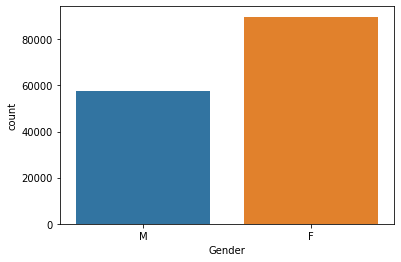

In [6]:
sns.countplot(x=df['Gender'], data=df)
plt.show()

## Drop irrelevant columns

In [7]:
df = df.drop(['Count', 'Probability'], axis=1)
df.head()

,Name,Gender
0,James,M
1,John,M
2,Robert,M
3,Michael,M
4,William,M


In [8]:
df['Gender'].value_counts()

F    89749
M    57520
Name: Gender, dtype: int64

## Check null values

In [9]:
df.isna().sum()

Name      0
Gender    0
dtype: int64

## Replace categorical sex values to numerical
- M: 0
- F: 1

In [10]:
gender_map = {'M':0,'F':1}
df['Gender'].replace(gender_map, inplace=True)
df.head()

,Name,Gender
0,James,0
1,John,0
2,Robert,0
3,Michael,0
4,William,0


In [11]:
df['Gender'].value_counts()

1    89749
0    57520
Name: Gender, dtype: int64

In [12]:
X = df['Name']

## Feature extraction

In [13]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [14]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1957975',
 'aaban',
 'aabha',
 'aabid',
 'aabida',
 'aabidah',
 'aabigail',
 'aabir',
 'aabira',
 'aabish',
 'aabriella',
 'aabrish',
 'aachal',
 'aada',
 'aadam',
 'aadan',
 'aadarsh',
 'aadav',
 'aadavan',
 'aadaya',
 'aaden',
 'aadesh',
 'aadhara',
 'aadharsh',
 'aadhav',
 'aadhavan',
 'aadhi',
 'aadhira',
 'aadhiran',
 'aadhiyah',
 'aadhvik',
 'aadhvika',
 'aadhya',
 'aadhyan',
 'aadhyareddy',
 'aadhyasri',
 'aadi',
 'aadian',
 'aadil',
 'aadilynn',
 'aadin',
 'aadish',
 'aadison',
 'aadit',
 'aadith',
 'aadithya',
 'aaditri',
 'aaditya',
 'aadiv',
 'aadnan',
 'aadon',
 'aadoney',
 'aadra',
 'aadrian',
 'aadrika',
 'aadrit',
 'aadriti',
 'aadvi',
 'aadvik',
 'aadvika',
 'aadya',
 'aadyaa',
 'aadyant',
 'aadyn',
 'aaenab',
 'aaesha',
 'aafia',
 'aafiya',
 'aafiyah',
 'aafke',
 'aafreen',
 'aafrin',
 'aaftaab',
 'aaftab',
 'aagam',
 'aagampreet',
 'aagand',
 'aage',
 'aagje',
 'aagna',
 'aagot',
 'aahaan',
 'aahan',
 'aahana',
 'aaheli',
 'aahil',
 'aahim',
 'aahir',
 'aahlia',
 'a

In [15]:
X, y = X, df['Gender']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
X_train.shape, y_train.shape

((98670, 126918), (98670,))

In [17]:
X_test.shape, y_test.shape

((48599, 126918), (48599,))

## Training the model

### Printing predicted gender by names helper method



In [18]:
def print_pred(names, predictions):
  for i in range(len(names)):
    if predictions[i] == 0:
      print(names[i], ": Male")
    else:
      print(names[i], ": Female")

# Naive Bayes MultinomialNB

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5682009917899545

In [21]:
print("Accuracy: ",clf.score(X_train, y_train), "%")

Accuracy:  0.9339008817269687 %


### Multi-NB Prediction

In [22]:
s_name = ['Mart Anthony', 'Andrea', 'Myka', 'Monica', 'Mark', 'John', 'Johhny', 'Marie']
vector = cv.transform(s_name).toarray()

In [23]:
prediction = clf.predict(vector)
print_pred(s_name, prediction)

Mart Anthony : Male
Andrea : Female
Myka : Female
Monica : Female
Mark : Male
John : Male
Johhny : Male
Marie : Female


# Save the model and vectorizer

In [24]:
import pickle

In [25]:
pickle.dump(clf, open('gender_classifier.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl', 'wb'))